## Problem

The task is to create a model that can closely predict if a person is a smoker or not given the features in the dataset.

In order to correctly predict if the person is a smoker or not, I need to think about the following;<br>
    - What type of machine learning model will I employ? - best answered once different algorithms are tried out to see one with the highest accuracy score.<br>
    - What is my target feature? Identified depending on the problem objective. In this case, 'smoker' is the target feature.
    - Is my target feature continuous or discrete/categorical? 'smoker' is categorical.<br>
    - Is it a classification or a regression task, or something else?Target feature is categorical thus it is a classification task. <br>
    - Is it batch or online learning? for this instance, it is batch learning as there is no continuouis flow of data into the system. <br>
    
Once the questions are correctly answered, then from then, it will be easier to know which models to work with

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Understanding the data

In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(df.region.unique())
print(df.sex.unique())

['southwest' 'southeast' 'northwest' 'northeast']
['female' 'male']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# checcking existence of missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# using LabelEncoder on the smoker to convert it to numeric without creating another feature
# we can try, in a different notebook, to binarize the sex and region features 
# to see which option generates highest accuracy score

le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [7]:
df['smoker'].head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
print(df.sex.unique())
print(df.smoker.unique())
print(df.region.unique())

[0 1]
[1 0]
[3 2 1 0]


In [10]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [11]:
df.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='region', ylabel='charges'>

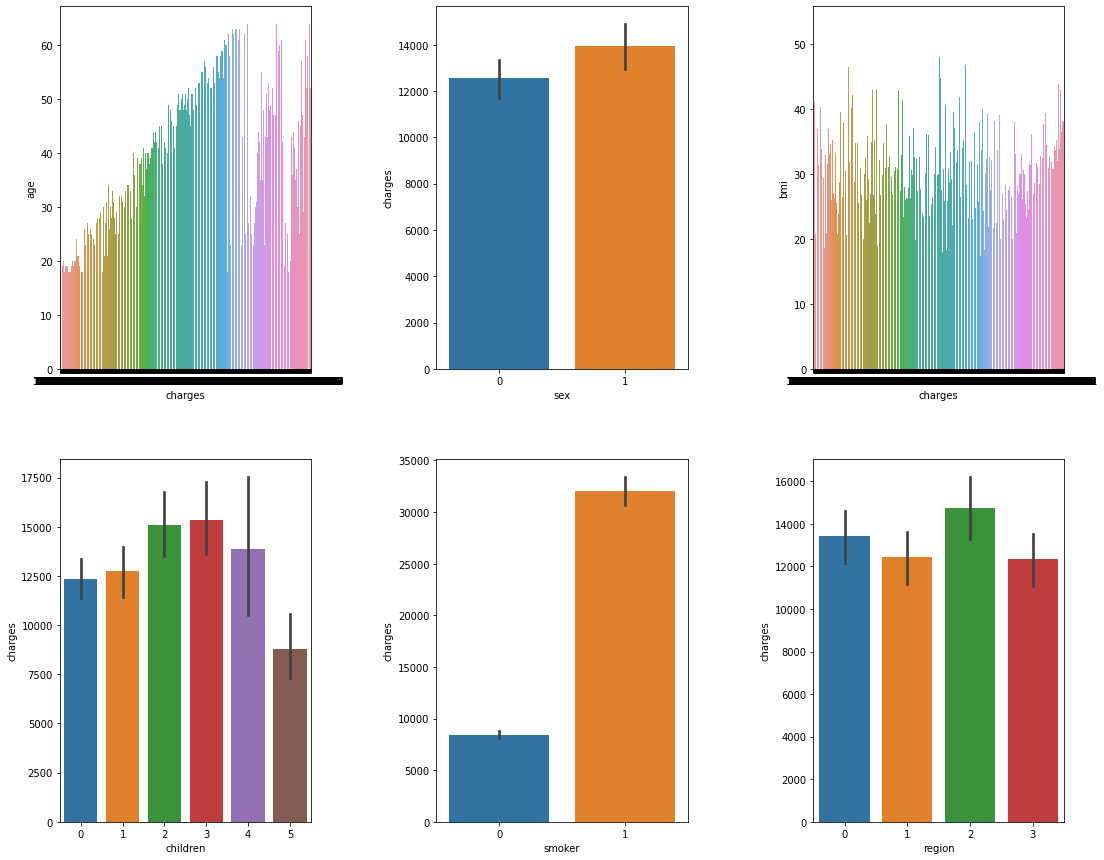

In [12]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

sns.barplot(ax=ax0,data=df,x='charges',y = 'age')
sns.barplot(ax=ax1,data=df,x='sex',y = 'charges')
sns.barplot(ax=ax2,data=df,x='charges',y = 'bmi')
sns.barplot(ax=ax3,data=df,x='children',y = 'charges')
sns.barplot(ax=ax4,data=df,x='smoker',y = 'charges')
sns.barplot(ax=ax5,data=df,x='region',y = 'charges')

<AxesSubplot:>

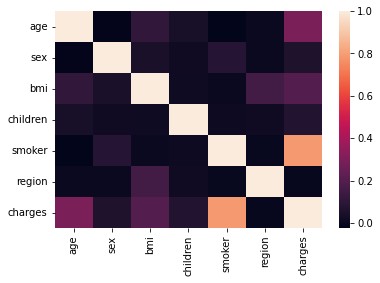

In [13]:
sns.heatmap(df.corr())

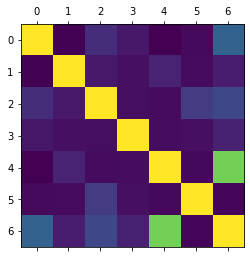

In [14]:
plt.matshow(df.corr())
plt.show()

In [15]:
X = df.drop(columns = ['smoker'])
y = df['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.25,
                                                   random_state=42)

In [16]:
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=42))
])

model_svm = pipe1.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
model_svm.score(X_train, y_train)

0.9680957128614157

In [17]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])


model_kn = pipe2.fit(X_train, y_train)

y_pred_kn = model_kn.predict(X_test)

model_kn.score(X_train, y_train)

0.9581256231306082

In [18]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

model_lr = pipe3.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
model_lr.score(X_train, y_train)

0.9571286141575274

In [19]:
pipe4 = Pipeline([('scaler', StandardScaler()), 
                 ('model', RandomForestClassifier())])

model_rf = pipe4.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
model_rf.score(X_train, y_train)

1.0

In [20]:
pipe5 = Pipeline([('scaler', StandardScaler()), 
                 ('model', GradientBoostingClassifier())])
model_gb = pipe5.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

model_gb.score(X_train, y_train)

0.9970089730807578

In [21]:
pipe6 = make_pipeline(StandardScaler(), DecisionTreeClassifier())
model_dt = pipe6.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)


In [22]:
print('Accuracy score SVM: {:.4f}' .format(accuracy_score(y_test, y_pred_svm)))
print('Accuracy score KN:  {:.4f}' .format(accuracy_score(y_test, y_pred_kn)))
print('Accuracy score LR:  {:.4f}' .format(accuracy_score(y_test, y_pred_lr)))
print('Accuracy score RF:  {:.4f}' .format(accuracy_score(y_test, y_pred_rf)))
print('Accuracy score GB:  {:.4f}' .format(accuracy_score(y_test, y_pred_gb)))
print('Accuracy score DT:  {:.4f}' .format(accuracy_score(y_test, y_pred_dt)))

Accuracy score SVM: 0.9642
Accuracy score KN:  0.9493
Accuracy score LR:  0.9612
Accuracy score RF:  0.9701
Accuracy score GB:  0.9701
Accuracy score DT:  0.9612


In [23]:
print('Random Forest Report')
print(classification_report(y_test, y_pred_rf))
print('Support Vector Classifier Report')
print(classification_report(y_test, y_pred_svm))
print('Kneighbors Report')
print(classification_report(y_test, y_pred_kn))
print('Decision Tree Report')
print(classification_report(y_test, y_pred_dt))
print('Gradient Boosting Report')
print(classification_report(y_test, y_pred_gb))
print('Logistic Regression Report')
print(classification_report(y_test, y_pred_lr))

Random Forest Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       267
           1       0.89      0.97      0.93        68

    accuracy                           0.97       335
   macro avg       0.94      0.97      0.96       335
weighted avg       0.97      0.97      0.97       335

Support Vector Classifier Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       267
           1       0.85      1.00      0.92        68

    accuracy                           0.96       335
   macro avg       0.93      0.98      0.95       335
weighted avg       0.97      0.96      0.97       335

Kneighbors Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       267
           1       0.86      0.90      0.88        68

    accuracy                           0.95       335
   macro avg       0.92      0.93      0.92       335
we

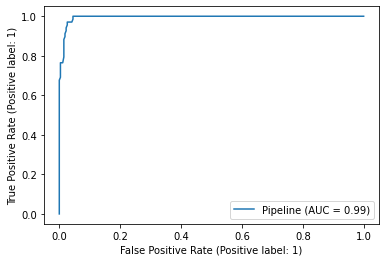

In [24]:
plot_roc_curve(model_rf, X_test, y_test)

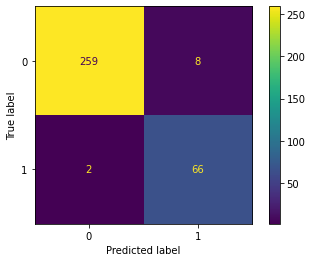

In [25]:
predictions = model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf, labels = model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
disp.plot()
plt.show()

In [26]:
# Calculating Model Specificity and Sensitivity